In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
files = ['cnn_trad_fpool3.csv','C64.csv','TCResNet8.csv', 'TCResNetDilated.csv']

In [3]:
labels = [file[:-4] for file in files]
results = [pd.read_csv(file) for file in files]

In [4]:
results[0].head()

,train.way,test.way,train.shot,test.shot,train.query,test.query,train.episodes,test.episodes,background,silence,...,epochs,lr,wd,train.acc,val.acc,timestamp,test.loss.mean,test.loss.confidence,test.acc.mean,test.acc.confidence
0,2,2,1,1,5,15,200,100,False,False,...,200,0.001,0.0,0.8100,0.731667,2019-11-05 10:33:36,0.570286,0.035751,0.692333,0.034382
1,2,2,5,5,5,15,200,100,True,False,...,200,0.001,0.0,0.9415,0.887333,2019-11-05 10:40:03,0.302966,0.039071,0.868000,0.021537
2,4,4,10,10,5,15,200,100,False,False,...,200,0.001,0.0,0.9238,0.795467,2019-11-05 12:04:50,0.684770,0.026260,0.739600,0.011499
3,4,4,10,10,5,15,200,100,True,True,...,200,0.001,0.0,0.9066,0.628933,2019-11-05 12:06:25,0.873923,0.029432,0.630000,0.014146
4,4,4,10,10,5,15,200,100,True,False,...,200,0.001,0.0,0.8662,0.751467,2019-11-05 12:06:57,0.782082,0.025123,0.685200,0.013221


In [5]:
way = 4 # N-Way classification to compare

In [6]:
results = [df[df['train.way'] == way] for df in results]

In [7]:
shots = sorted(results[0]['train.shot'].unique())
print(shots)

[1, 5, 10, 15, 20]


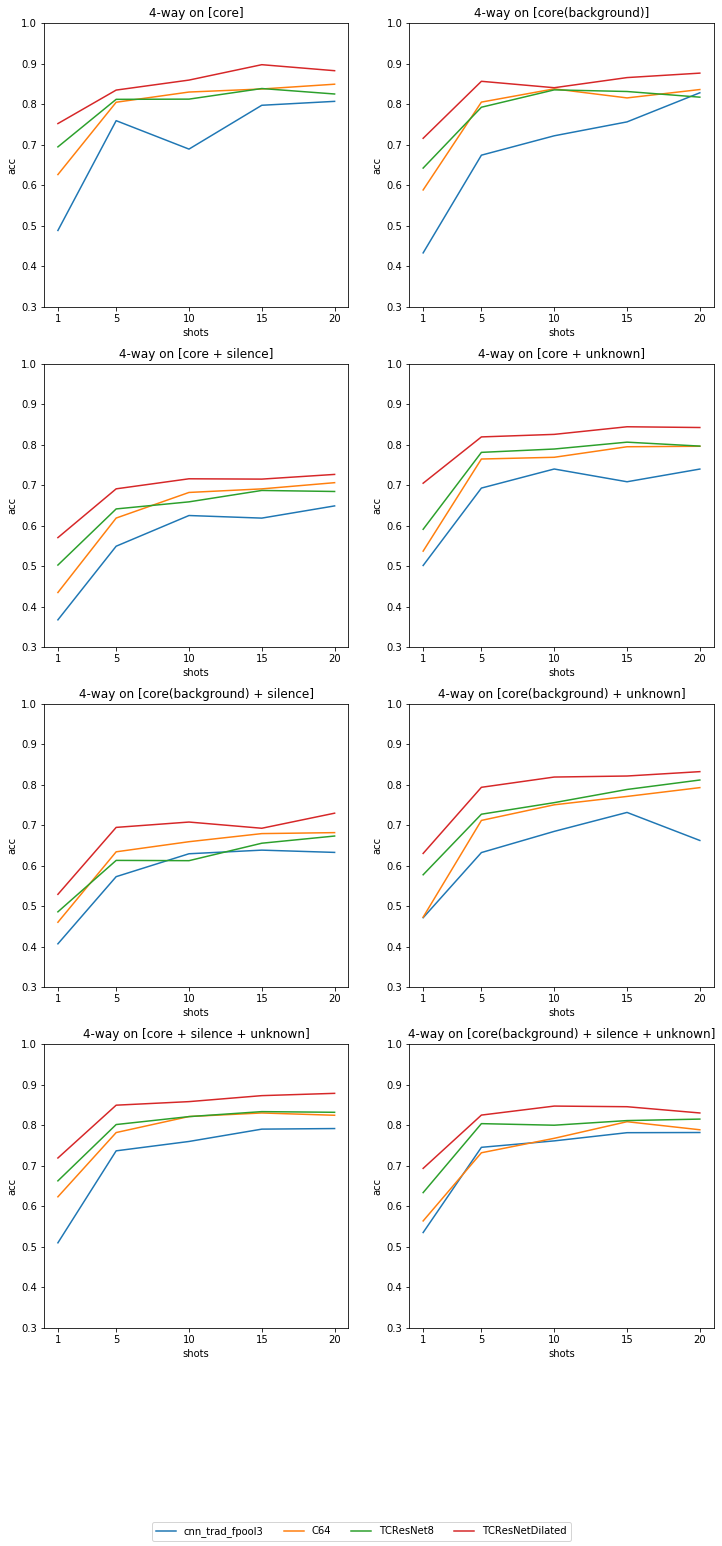

In [8]:
fig = plt.figure(figsize=(12,24))

for i in range(8):
    
    include_background = False
    include_silence = False
    include_unknown = False
    title = 'core'

    if i == 1:
        include_background = True
        title = 'core(background)'
    elif i == 2:
        include_silence = True
        title = 'core + silence'
    elif i == 3:
        include_unknown = True
        title = 'core + unknown'
    elif i == 4:
        include_background = True
        include_silence = True
        title = 'core(background) + silence'
    elif i == 5:
        include_background = True
        include_unknown = True
        title = 'core(background) + unknown'
    elif i == 6:
        include_unknown = True
        include_silence = True
        title = 'core + silence + unknown'
    elif i == 7:
        include_background = True
        include_unknown = True
        include_silence = True
        title = 'core(background) + silence + unknown'
        
    ax = fig.add_subplot(4,2,i+1)
   
    for j, df in enumerate(results):
        df = df[(df['background'] == include_background) & 
                 (df['silence'] == include_silence) & 
                 (df['unknown'] == include_unknown)][['train.shot','test.acc.mean']]
        
        acc = df.sort_values('train.shot')['test.acc.mean'].values
        ax.plot(shots, acc, label=labels[j])
    
    ax.set_title('{}-way on [{}]'.format(way, title))
    ax.set_ylabel('acc')
    ax.set_xlabel('shots')
    ax.set_xticks(shots)
    ax.set_yticks(np.linspace(0.3,1.0,8))
    
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='lower center', ncol=4)